# Neural Networks - intro
## Part 1 - XOR
1. Using the XOR dataset below, train (400 epochs) a neural network (NN) using 1, 2, 3, 4, and 5 hidden layers (where each layer has only 2 neurons). For each n layers, store the resulting loss score along with n. Plot the results to find what the optimal number of layers is.
2. Repeat the above with 3 neurons in each Hidden layers. How do these results compare to the 2 neuron layers?
3. Repeat the above with 4 neurons in each Hidden layers. How do these results compare to the 2 and 3 neuron layers?
3. Using the most optimal configuraion (n-layers, k-neurons per layer), compare how `tanh`, `sigmoid`,`softplus` and `relu` effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)
4. Again with the most optimal setup, try other optimizers (instead of `SGD`) and report on the loss score. (https://keras.io/optimizers/)

## Part 2 - BYOD (Bring your own Dataset)
Using your own dataset, experiment and find the best Neural Network configuration. 
You may use any resource to improve results, just reference it.

While you may use any dataset, I'd prefer you didn't use the diabetes dataset used in the lesson.

https://stackoverflow.com/questions/34673164/how-to-train-and-tune-an-artificial-multilayer-perceptron-neural-network-using-k

https://keras.io/

In [1]:
!pip3 install tensorflow keras

     ---------------------------------------- 30.9/30.9 MB 7.4 MB/s eta 0:00:00
     ---------------------------------------- 12.7/12.7 MB 6.6 MB/s eta 0:00:00
     -------------------------------------- 896.6/896.6 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\gdlev\\anaconda3\\lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [11]:

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD  #Stochastic Gradient Descent

import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

import matplotlib.pyplot as plt
%matplotlib inline


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


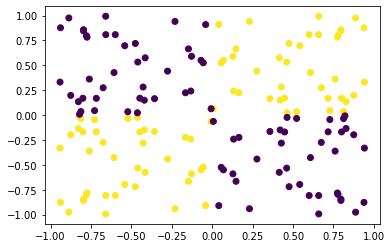

In [34]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))
X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)
plt.scatter(*zip(*X), c=y)

In [53]:
num_layers = [1,2,3,4,5]
scores_2 = []
for num_layer in num_layers:
    print(f"Number of Layers: {num_layer} \n\n")
    model = Sequential()
    for i in range(num_layer):
        model.add(Dense(2, activation = 'relu'))
    model.compile(loss = 'binary_crossentropy')
    
    history = model.fit(X,y,epochs = 400, batch_size = 10)
    
    loss_values = history.history['loss']
    epochs = list(range(1, len(loss_values)+1))
    scores_2.append(loss_values)
    # plt.plot(epochs, loss_values, label='Training Loss')
    # plt.xlabel('Epochs')
    # plt.ylabel('Loss')
    # plt.legend()

    # plt.show()
    # build model and evaluate
    # score = model.evaluate(X,y)
    # scores_2.append(score)
    
# plot scores

Number of Layers: 1 


Epoch 1/400
16/16 [==============================] - 0s 1ms/step - loss: 4.2036
Epoch 2/400
16/16 [==============================] - 0s 2ms/step - loss: 4.1928
Epoch 3/400
16/16 [==============================] - 0s 2ms/step - loss: 4.1845
Epoch 4/400
16/16 [==============================] - 0s 2ms/step - loss: 4.1771
Epoch 5/400
16/16 [==============================] - 0s 2ms/step - loss: 4.1432
Epoch 6/400
16/16 [==============================] - 0s 1ms/step - loss: 4.1339
Epoch 7/400
16/16 [==============================] - 0s 1ms/step - loss: 4.1288
Epoch 8/400
16/16 [==============================] - 0s 2ms/step - loss: 4.1237
Epoch 9/400
16/16 [==============================] - 0s 2ms/step - loss: 4.1177
Epoch 10/400
16/16 [==============================] - 0s 2ms/step - loss: 4.1118
Epoch 11/400
16/16 [==============================] - 0s 2ms/step - loss: 4.1057
Epoch 12/400
16/16 [==============================] - 0s 2ms/step - loss: 4.0998
Epoch 13/400
1

Text(0.5, 1.0, '2 Neurons Per Layer')

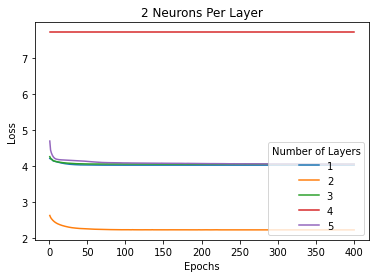

In [63]:
epochs = range(1,len(scores_2[0])+1)
plt.figure()
for i in range(len(scores_2)):
    plt.plot(epochs, scores_2[i], label = f"{i + 1}")
plt.legend(title = "Number of Layers",loc = "lower right")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("2 Neurons Per Layer")

In [36]:

model = Sequential()
model.add(Dense(2, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, batch_size=10)
# evaluate the model
scores = model.evaluate(X, y)

sgd = SGD(lr=0.1)
# print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



print(f"{model.metrics_names[1]}: {scores[1]*100:.2f}%")
print(f"{model.metrics_names[0]}: {scores[0]:.2f}")

Epoch 1/100
16/16 [==============================] - 0s 2ms/step - loss: 5.3487 - accuracy: 0.5000
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 4.8394 - accuracy: 0.5000
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 4.7891 - accuracy: 0.5000
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 4.7616 - accuracy: 0.5000
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 4.7383 - accuracy: 0.5000
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 4.7195 - accuracy: 0.5000
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 4.7013 - accuracy: 0.5000
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 4.6853 - accuracy: 0.5000
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 4.6708 - accuracy: 0.5000
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 4.6572 - accuracy: 0.5000
Epoch 11/

c:\Users\gdlev\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [7]:

model = Sequential()

model.add(Dense(2, input_dim=2, activation='tanh'))  #sigmoid, relu
# model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1,input_dim=2, activation='sigmoid'))


sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer='sgd')

model.fit(X, y, batch_size=2, epochs=400) #160/4 = 40 per epoch
print(model.predict_proba(X).reshape(4*n))

# evaluate the model
scores = model.evaluate(X, y)

In [126]:
print(model.predict_proba(X).reshape(4*n))


 32/160 [=====>........................] - ETA: 0s[  9.99993205e-01   9.98063982e-01   9.99981880e-01   9.99957442e-01
   9.99872684e-01   9.97652829e-01   8.71294558e-01   9.99993682e-01
   9.99923706e-01   9.99987245e-01   9.99928474e-01   9.08705473e-01
   9.98491883e-01   9.94634151e-01   9.99985576e-01   9.99792159e-01
   9.24485922e-01   9.99975681e-01   9.95165586e-01   9.99993801e-01
   9.87509310e-01   9.99875903e-01   9.99818981e-01   9.99771178e-01
   9.67822790e-01   9.99614358e-01   9.99584973e-01   9.99593914e-01
   9.99992847e-01   9.99965191e-01   9.99969006e-01   9.99054730e-01
   9.99964476e-01   9.99507070e-01   9.57289815e-01   9.97950852e-01
   9.99644041e-01   9.86211777e-01   9.99951243e-01   8.97229910e-01
   9.99953270e-01   9.86812890e-01   9.99979377e-01   9.99080062e-01
   9.99983549e-01   9.99907613e-01   7.93032885e-01   9.99898076e-01
   9.99527693e-01   9.99975204e-01   9.99111235e-01   9.64001596e-01
   9.99922633e-01   9.70607460e-01   9.99877095e-01  

In [121]:
scores = model.evaluate(X, y)
scores, model.metrics_names


 32/160 [=====>........................] - ETA: 1s

(0.078828822076320651, ['loss'])


 32/160 [=====>........................] - ETA: 0s

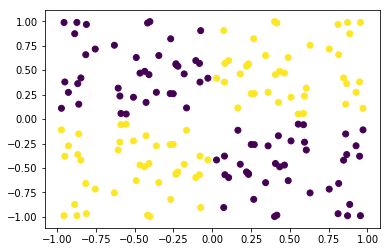

In [127]:
plt.scatter(*zip(*X), c=model.predict_classes(X))

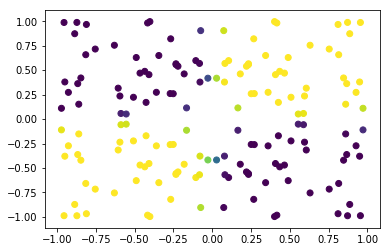

In [128]:
plt.scatter(*zip(*X), c=model.predict(X))

## Using Diabetes data 

http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

In [129]:
# load pima indians dataset
dataset = numpy.loadtxt("../../data/pima-indians-diabetes.data", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [136]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=8, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=1000, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/1000
768/768 [==============================] - 1s - loss: 0.6821 - acc: 0.5820     
Epoch 2/1000
768/768 [==============================] - 0s - loss: 0.6273 - acc: 0.6536     
Epoch 3/1000
768/768 [==============================] - 0s - loss: 0.6122 - acc: 0.6719     
Epoch 4/1000
768/768 [==============================] - 0s - loss: 0.6111 - acc: 0.6680     
Epoch 5/1000
768/768 [==============================] - 0s - loss: 0.6065 - acc: 0.6862     
Epoch 6/1000
768/768 [==============================] - 0s - loss: 0.6049 - acc: 0.6745     
Epoch 7/1000
768/768 [==============================] - 0s - loss: 0.5978 - acc: 0.6810     
Epoch 8/1000
768/768 [==============================] - 0s - loss: 0.5961 - acc: 0.6823     
Epoch 9/1000
768/768 [==============================] - 0s - loss: 0.5927 - acc: 0.6966     
Epoch 10/1000
768/768 [==============================] - 0s - loss: 0.5906 - acc: 0.6953     
Epoch 11/1000
768/768 [==============================] - 0s - loss: 0

768/768 [==============================] - 0s - loss: 0.5103 - acc: 0.7539     
Epoch 175/1000
768/768 [==============================] - 0s - loss: 0.5135 - acc: 0.7565     
Epoch 176/1000
768/768 [==============================] - 0s - loss: 0.5115 - acc: 0.7552     
Epoch 177/1000
768/768 [==============================] - 0s - loss: 0.5084 - acc: 0.7500     
Epoch 178/1000
768/768 [==============================] - 0s - loss: 0.5079 - acc: 0.7591     
Epoch 179/1000
768/768 [==============================] - 0s - loss: 0.5088 - acc: 0.7591     
Epoch 180/1000
768/768 [==============================] - 0s - loss: 0.5059 - acc: 0.7630     
Epoch 181/1000
768/768 [==============================] - 0s - loss: 0.5171 - acc: 0.7409     
Epoch 182/1000
768/768 [==============================] - 0s - loss: 0.5123 - acc: 0.7435     
Epoch 183/1000
768/768 [==============================] - 0s - loss: 0.5168 - acc: 0.7526     
Epoch 184/1000
768/768 [==============================] - 0s - lo

768/768 [==============================] - 0s - loss: 0.4906 - acc: 0.7656     
Epoch 347/1000
768/768 [==============================] - 0s - loss: 0.4924 - acc: 0.7734     
Epoch 348/1000
768/768 [==============================] - 0s - loss: 0.4848 - acc: 0.7734     
Epoch 349/1000
768/768 [==============================] - 0s - loss: 0.4895 - acc: 0.7669     
Epoch 350/1000
768/768 [==============================] - 0s - loss: 0.4924 - acc: 0.7656     
Epoch 351/1000
768/768 [==============================] - 0s - loss: 0.4906 - acc: 0.7643     
Epoch 352/1000
768/768 [==============================] - 0s - loss: 0.4851 - acc: 0.7747     
Epoch 353/1000
768/768 [==============================] - 0s - loss: 0.4825 - acc: 0.7747     
Epoch 354/1000
768/768 [==============================] - 0s - loss: 0.4781 - acc: 0.7786     
Epoch 355/1000
768/768 [==============================] - 0s - loss: 0.4828 - acc: 0.7656     
Epoch 356/1000
768/768 [==============================] - 0s - lo

768/768 [==============================] - 0s - loss: 0.4801 - acc: 0.7760     
Epoch 519/1000
768/768 [==============================] - 0s - loss: 0.4730 - acc: 0.7760     
Epoch 520/1000
768/768 [==============================] - 0s - loss: 0.4705 - acc: 0.7865     
Epoch 521/1000
768/768 [==============================] - 0s - loss: 0.4742 - acc: 0.7734     
Epoch 522/1000
768/768 [==============================] - 0s - loss: 0.4693 - acc: 0.7878     
Epoch 523/1000
768/768 [==============================] - 0s - loss: 0.4825 - acc: 0.7630     
Epoch 524/1000
768/768 [==============================] - 0s - loss: 0.4787 - acc: 0.7812     
Epoch 525/1000
768/768 [==============================] - 0s - loss: 0.4712 - acc: 0.7865     
Epoch 526/1000
768/768 [==============================] - 0s - loss: 0.4652 - acc: 0.7878     
Epoch 527/1000
768/768 [==============================] - 0s - loss: 0.4686 - acc: 0.7891     
Epoch 528/1000
768/768 [==============================] - 0s - lo

768/768 [==============================] - 0s - loss: 0.4566 - acc: 0.7812     
Epoch 691/1000
768/768 [==============================] - 0s - loss: 0.4701 - acc: 0.7773     
Epoch 692/1000
768/768 [==============================] - 0s - loss: 0.4743 - acc: 0.7799     
Epoch 693/1000
768/768 [==============================] - 0s - loss: 0.4768 - acc: 0.7773     
Epoch 694/1000
768/768 [==============================] - 0s - loss: 0.4626 - acc: 0.7878     
Epoch 695/1000
768/768 [==============================] - 0s - loss: 0.4622 - acc: 0.7904     
Epoch 696/1000
768/768 [==============================] - 0s - loss: 0.4624 - acc: 0.7826     
Epoch 697/1000
768/768 [==============================] - 0s - loss: 0.4634 - acc: 0.7917     
Epoch 698/1000
768/768 [==============================] - 0s - loss: 0.4624 - acc: 0.7813     
Epoch 699/1000
768/768 [==============================] - 0s - loss: 0.4590 - acc: 0.7917     
Epoch 700/1000
768/768 [==============================] - 0s - lo

768/768 [==============================] - 0s - loss: 0.4636 - acc: 0.7865     
Epoch 863/1000
768/768 [==============================] - 0s - loss: 0.4605 - acc: 0.7839     
Epoch 864/1000
768/768 [==============================] - 0s - loss: 0.4657 - acc: 0.7773     
Epoch 865/1000
768/768 [==============================] - 0s - loss: 0.4735 - acc: 0.7669     
Epoch 866/1000
768/768 [==============================] - 0s - loss: 0.4608 - acc: 0.7904     
Epoch 867/1000
768/768 [==============================] - 0s - loss: 0.4640 - acc: 0.7956     
Epoch 868/1000
768/768 [==============================] - 0s - loss: 0.4449 - acc: 0.7969     
Epoch 869/1000
768/768 [==============================] - 0s - loss: 0.4544 - acc: 0.7812     
Epoch 870/1000
768/768 [==============================] - 0s - loss: 0.4624 - acc: 0.7839     
Epoch 871/1000
768/768 [==============================] - 0s - loss: 0.4663 - acc: 0.7760     
Epoch 872/1000
768/768 [==============================] - 0s - lo